Информация об атрибутах:

Дата Время: каждые десять минут.
Температура: Погода Температура города Тетуан.
Влажность: Погода Влажность города Тетуан.
Скорость ветра города Тетуан.
общие диффузные потоки
диффузных потоков
энергопотребление зоны 1 города Тетуан.
энергопотребление зоны 2 города Тетуан.
энергопотребление зоны 3 города Тетуан.


In [1]:
import sklearn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px


from sklearn.linear_model import LinearRegression
#from catboost import CatBoost
import xgboost as xgb

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_data(data, title = ''):
    data1 = []
    
    for column in data.columns:
        trace = go.Scatter(
            x = data.index,
            y = data[column],
            mode = 'lines',
            name = column
        )
        data1.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data1, layout = layout)
    iplot(fig, show_link=False)

!pip install Prophet

import prophet
from prophet import Prophet
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot


#!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import statsmodels.api as st
import time
from time import time

In [2]:
data = pd.read_csv('C:/Users/анатолий/Documents/datasets/Tetuan City power consumption.csv', index_col=[0], parse_dates=[0])
data = data.resample('1D').sum()


In [3]:
data 

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01,1393.243,9866.78,45.381,17480.271,3743.125,4.098993e+06,2.554242e+06,2.573107e+06
2017-01-02,1796.670,10289.71,11.025,17338.246,3920.747,4.157207e+06,2.816312e+06,2.566190e+06
2017-01-03,1742.400,10797.36,11.047,17378.786,4114.751,4.400992e+06,2.888247e+06,2.537396e+06
2017-01-04,1513.365,10866.21,11.868,17706.142,4151.120,4.419336e+06,2.894699e+06,2.545012e+06
2017-01-05,1564.768,10229.83,12.081,17099.980,4282.767,4.435619e+06,2.884888e+06,2.543641e+06
...,...,...,...,...,...,...,...,...
2017-12-26,1673.545,9946.21,11.961,15384.483,7309.496,4.321941e+06,3.565009e+06,1.640978e+06
2017-12-27,2193.540,8560.21,11.812,13808.257,6005.529,4.315243e+06,3.608277e+06,1.655752e+06
2017-12-28,1967.380,9048.87,11.715,16217.303,4350.148,4.358449e+06,3.540276e+06,1.608052e+06


In [4]:
col = data.columns
col = ['Zone 2  Power Consumption', 'Zone 3  Power Consumption',
   'Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']
df = data.drop(columns=(col),axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-01-01 to 2017-12-30
Freq: D
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone 1 Power Consumption  364 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


,Zone 1 Power Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


In [5]:
plotly_data(df, title = "Ежедневное потребление электроэнергии в Zone 1 ")

<AxesSubplot:xlabel='DateTime'>

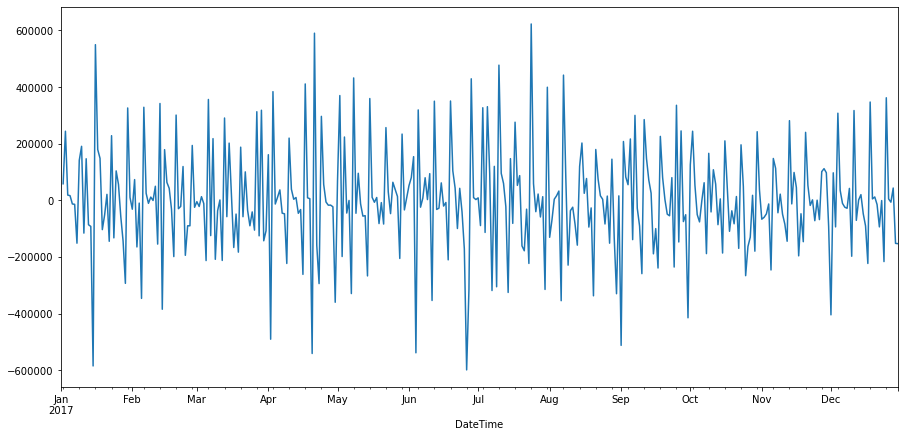

In [6]:
(df['Zone 1 Power Consumption'] - df['Zone 1 Power Consumption'].shift(1)).plot(figsize=(15, 7))

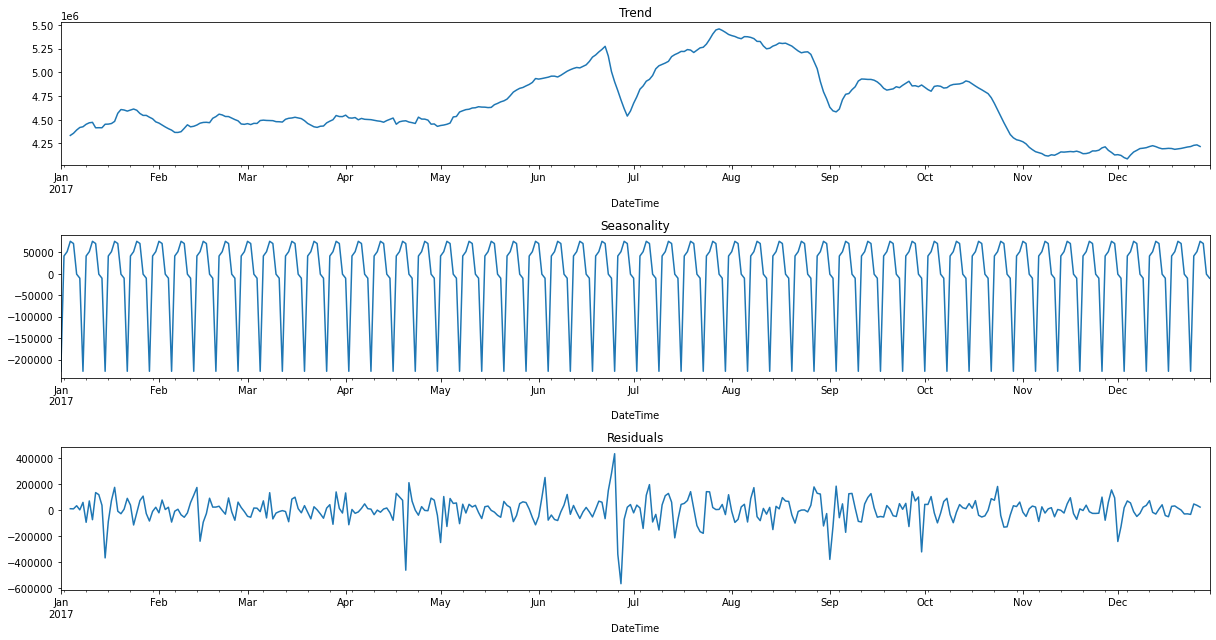

In [7]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(17, 9))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

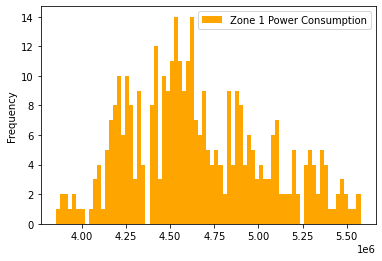

In [8]:
df.plot(kind='hist',bins=75,color='orange');

<AxesSubplot:xlabel='DateTime'>

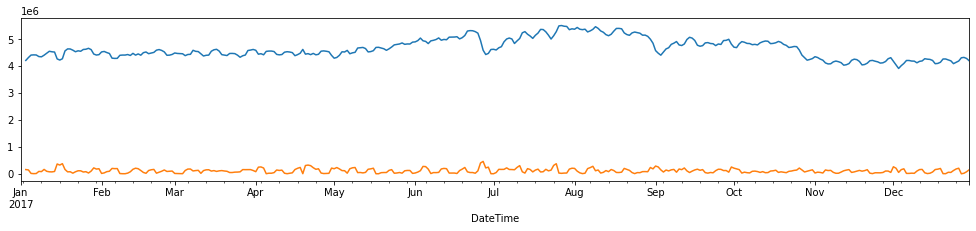

In [9]:
df['Zone 1 Power Consumption'].rolling(3).mean().plot(figsize=(17,3));
df['Zone 1 Power Consumption'].rolling(3).std().plot(figsize=(17,3))
#data1[['mean','std']].plot(figsize=(17,3));


Ряд не совсем стационарный -среднее и дисперсия меняются

In [10]:
iforest = IsolationForest(n_estimators=300, contamination=0.05)
iforest.fit(df[['Zone 1 Power Consumption']])

C:\Python27\anac\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05, n_estimators=300)

In [11]:
preds = iforest.predict(df)
preds[:5]

array([1, 1, 1, 1, 1])

In [12]:
df_outliers = df[preds == -1]
df_valid = df[preds != -1]

print("Original Samples : ",df.shape[0])
print("Number of Outliers : ", df_outliers.shape[0])
print("Number of Normal Samples : ", df_valid.shape[0])

Original Samples :  364
Number of Outliers :  19
Number of Normal Samples :  345


In [13]:
df['outliers'] = iforest.predict(df[['Zone 1 Power Consumption']])
df['outliers'][:5]

DateTime
2017-01-01    1
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    1
Freq: D, Name: outliers, dtype: int32

In [14]:

df['outliers'] = df['outliers'].apply(lambda x: 'yes'if (x == -1) else 'no')
df.query('outliers == "yes"')
fig = px.scatter(df.reset_index(),x='DateTime',y='Zone 1 Power Consumption', color='outliers',\
                 title='Идентификация аномалий ряда')
fig.update_xaxes(rangeslider_visible=True)
fig.show()
df.drop('outliers',axis=1,inplace=True)

In [15]:
df_outliers

,Zone 1 Power Consumption
DateTime,
2017-01-15,3.855099e+06
2017-07-19,5.449821e+06
2017-07-24,5.478238e+06
2017-07-25,5.536789e+06
2017-07-26,5.496424e+06
2017-07-27,5.518450e+06
2017-07-31,5.556397e+06
2017-08-01,5.425556e+06
2017-08-07,5.495430e+06


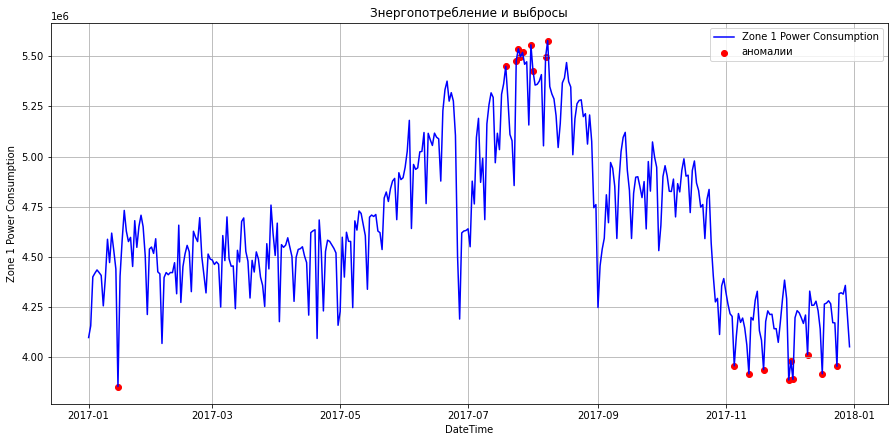

In [16]:
fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot()

ax.plot(df['Zone 1 Power Consumption'],color='blue',label='Zone 1 Power Consumption')
ax.scatter(x=df_outliers.index, y=df_outliers['Zone 1 Power Consumption'] , color = 'red',label='аномалии') 

plt.xlabel('DateTime')
plt.ylabel('Zone 1 Power Consumption')

plt.title('Знергопотребление и выбросы')

plt.legend(loc="best");
plt.grid(True)
plt.show()

Построим скользящее среднее

In [17]:
def moving_average(series, n):
    return np.average(series[-n:])

print('Предсказание на день', moving_average(df, 1))

Предсказание на день 4052976.42585


In [18]:
def plotMovingAverage(series, n):
    
    rolling_mean = series.rolling(window=n).mean().shift(1)
    
    rolling_std =  series.rolling(window=n).std().shift(1)
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std
    
    
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(series[n+1:], label="Actual values")
    plt.legend(loc="upper left")
    

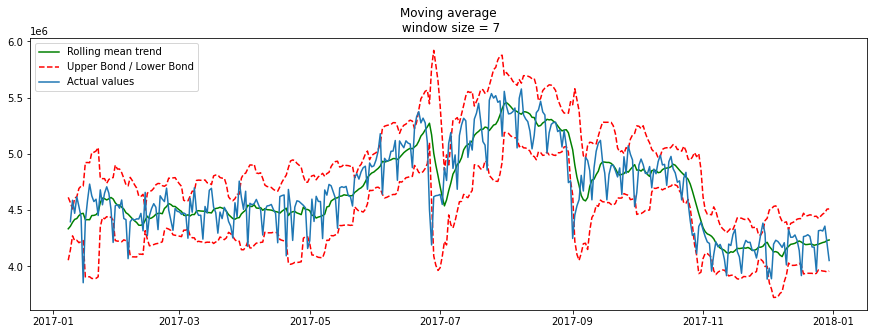

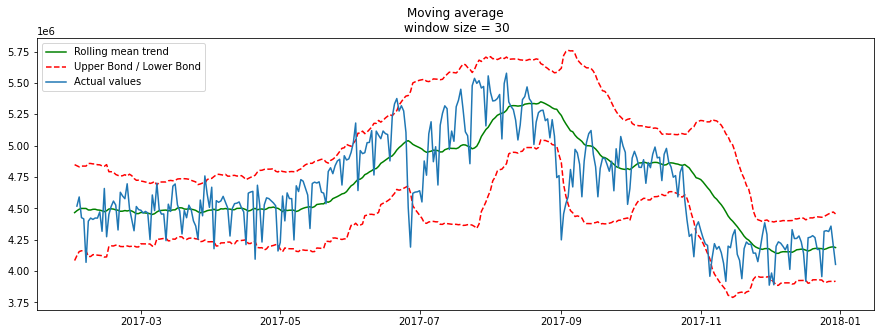

In [19]:
#plotMovingAverage(df, 1) # сглаживаем по дням
plotMovingAverage(df, 7) # сглаживаем по неделям
plotMovingAverage(df, 30) # сглаживаем по месяцам

Как можно заметить из характеристик и гистограммы, ряд у нас более менее однородный и имеет относительно небольшой разброс о чем свидетельствует коэффициент вариации: LaTeX:V = \frac {\sigma}{\bar{x}}, где LaTeX:\sigma — cреднеквадратическое отклонение, LaTeX:\bar{x} — среднее арифметическое выборки. В нашем случае он равен:

count    3.640000e+02
mean     4.657676e+06
std      3.843890e+05
min      3.855099e+06
25%      4.396491e+06
50%      4.596623e+06
75%      4.910512e+06
max      5.577623e+06
Name: Zone 1 Power Consumption, dtype: float64

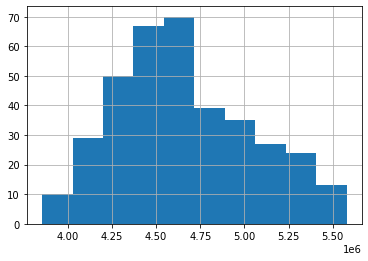

In [20]:
itog = df['Zone 1 Power Consumption'].describe()
df['Zone 1 Power Consumption'].hist()
itog

In [21]:
# ряд получился однородный
print (df['Zone 1 Power Consumption'].std()/df['Zone 1 Power Consumption'].mean())

0.0825280690755307


Проведем тест Харки — Бера для определения номарльности распределения, чтобы подтвердить предположение об однородности. Для этого в существует функция jarque_bera(), которая возвращает значения данной статистики:

In [22]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(df['Zone 1 Power Consumption'])
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print (itog)

        JB                p-value                skew             kurtosis     
-------------------------------------------------------------------------------
12.874548226491168 0.0016007642408472319 0.36581469067875105 2.4400091429574773
-------------------------------------------------------------------------------


Значение данной статистика свидетельствует о том, нулевая гипотеза о нормальности распределения отвергается с малой вероятностью (probably > 0.05), и, следовательно, наш ряд имеет нормального распределения

Наш ряд не очень нормален p<0.05

Функция SimpleTable() служит для оформления вывода. В нашем случае на вход ей подается массив значений (размерность не больше 2) и список с названиями столбцов или строк.
Многие методы и модели основаны на предположениях о стационарности ряда, но как было замечено ранее наш ряд таковым скорее всего не является. Поэтому для проверки проверки стационарности давайте проведем обобщенный тест Дикки-Фуллера на наличие единичных корней. Для этого в модуле statsmodels есть функция adfuller():

In [23]:
test = sm.tsa.adfuller(df['Zone 1 Power Consumption'])
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -1.5591473246082612
p-value:  0.5040758794686818
Critical values:  {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}
есть единичные корни, ряд не стационарен


In [24]:
df['Zone 1 Power Consumption'] = df['Zone 1 Power Consumption'].diff(periods=1).dropna()
df = df.dropna()
df

,Zone 1 Power Consumption
DateTime,
2017-01-02,58213.67091
2017-01-03,243785.31648
2017-01-04,18343.29115
2017-01-05,16283.54437
2017-01-06,-13057.21523
...,...
2017-12-26,4684.41056
2017-12-27,-6698.09890
2017-12-28,43206.08369


<AxesSubplot:xlabel='DateTime'>

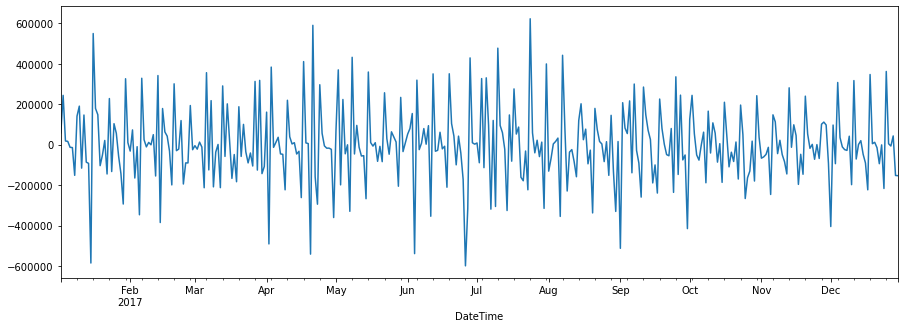

In [25]:
df['Zone 1 Power Consumption'].plot(figsize=(15,5))

In [26]:
test = sm.tsa.adfuller(df['Zone 1 Power Consumption'])
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -5.52277290164891
p-value:  1.8614887838516088e-06
Critical values:  {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}
единичных корней нет, ряд стационарен


Ряд стал стационарным

Cоздаем новые признаки

In [27]:
decomposed = seasonal_decompose(df)
season =decomposed.seasonal

In [28]:
def prepare_data(data, lags, test_size,rolling_mean_size):
        
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    
    # добавляем лаги исходного ряда в качестве признаков
    for ll in lags:
        data['lag_{}'.format(ll)] = data['Zone 1 Power Consumption'].shift(ll)
        
    
    data['seasonal'] = season
    data['hour'] = data.index.hour
    data['weekday'] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    data['rolling_mean'] = data['Zone 1 Power Consumption'].shift().rolling(rolling_mean_size).mean()
  
    data = data.dropna()
    data = data.reset_index(drop=True)
    
    
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop("Zone 1 Power Consumption", axis=1)
    y_train = data.loc[:test_index]["Zone 1 Power Consumption"]
    X_test = data.loc[test_index:].drop("Zone 1 Power Consumption", axis=1)
    y_test = data.loc[test_index:]["Zone 1 Power Consumption"]
    
    return X_train, X_test, y_train, y_test

C:\Python27\anac\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Linear regression\n Mean absolute error ')

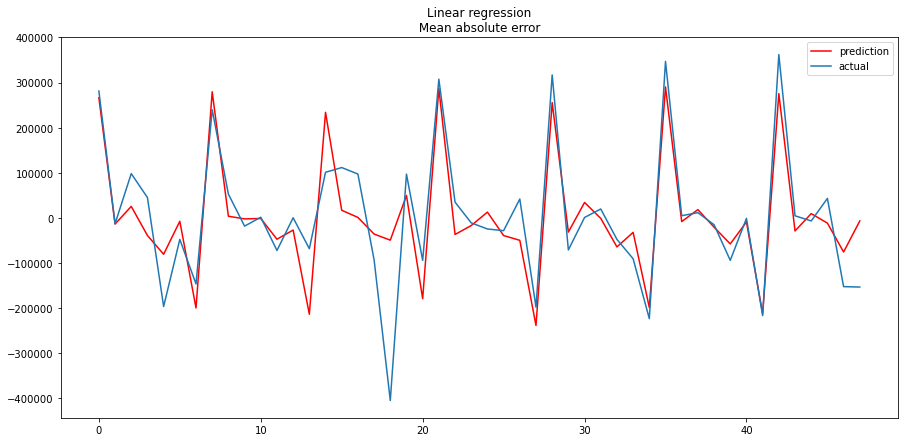

In [29]:

X_train, X_test, y_train, y_test = prepare_data(df, lags = [1,2,3,4,5], test_size=0.15,rolling_mean_size=7)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error ".format(round(mean_absolute_error(prediction, y_test))))


In [30]:
print("RMSE тестовой выборки для LinearRegression: ", round((mean_squared_error(y_test,prediction))**0.5))
print('MAE на тестовой выборке для LinearRegression :' ,mean_absolute_error(y_test,prediction).round(1))

RMSE тестовой выборки для LinearRegression:  79621
MAE на тестовой выборке для LinearRegression : 54841.0


In [31]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,seasonal,hour,weekday,is_weekend,rolling_mean
0,-151601.01260,-14333.16462,-13057.21523,16283.54437,18343.29115,268509.725395,0,0,0,22519.204351
1,141168.60758,-151601.01260,-14333.16462,-13057.21523,16283.54437,10124.038272,0,1,0,34369.909590
2,190517.46822,141168.60758,-151601.01260,-14333.16462,-13057.21523,23905.773852,0,2,0,26760.216981
3,-115995.94922,190517.46822,141168.60758,-151601.01260,-14333.16462,-4777.642960,0,3,0,7568.896929
4,146618.73420,-115995.94922,190517.46822,141168.60758,-151601.01260,-71421.547135,0,4,0,26188.209761
...,...,...,...,...,...,...,...,...,...,...
304,-44178.46158,112818.46153,147519.99998,-246166.15381,-13089.23084,-4777.642960,0,3,0,-21641.318691
305,21624.61542,-44178.46158,112818.46153,147519.99998,-246166.15381,-71421.547135,0,4,0,-9938.461533
306,-49107.69231,21624.61542,-44178.46158,112818.46153,147519.99998,-9430.407515,0,5,1,-10082.637373
307,-84270.76925,-49107.69231,21624.61542,-44178.46158,112818.46153,-216909.939910,0,6,1,-20251.428574


In [32]:
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,seasonal,hour,weekday,is_weekend,rolling_mean
308,-144750.76923,-84270.76925,-49107.69231,21624.61542,-44178.46158,268509.725395,0,0,0,-5763.516491
309,281138.46157,-144750.76923,-84270.76925,-49107.69231,21624.61542,10124.038272,0,1,0,13324.835164
310,-12886.15382,281138.46157,-144750.76923,-84270.76925,-49107.69231,23905.773852,0,2,0,-4632.967029
311,98203.07688,-12886.15382,281138.46157,-144750.76923,-84270.76925,-4777.642960,0,3,0,15707.252751
312,45150.76929,98203.07688,-12886.15382,281138.46157,-144750.76923,-71421.547135,0,4,0,19068.131876
313,-196307.69233,45150.76929,98203.07688,-12886.15382,281138.46157,-9430.407515,0,5,1,-1960.439556
314,-47606.15388,-196307.69233,45150.76929,98203.07688,-12886.15382,-216909.939910,0,6,1,3277.362640
315,-146344.61536,-47606.15388,-196307.69233,45150.76929,98203.07688,268509.725395,0,0,0,3049.670336
316,239846.15380,-146344.61536,-47606.15388,-196307.69233,45150.76929,10124.038272,0,1,0,-2849.230774
317,52750.76925,239846.15380,-146344.61536,-47606.15388,-196307.69233,23905.773852,0,2,0,6527.472521


Посмотрим, какие лаги действительно значимые

In [33]:
y_train_series = pd.Series(data=np.array(y_train), index=df.index[:len(y_train)])

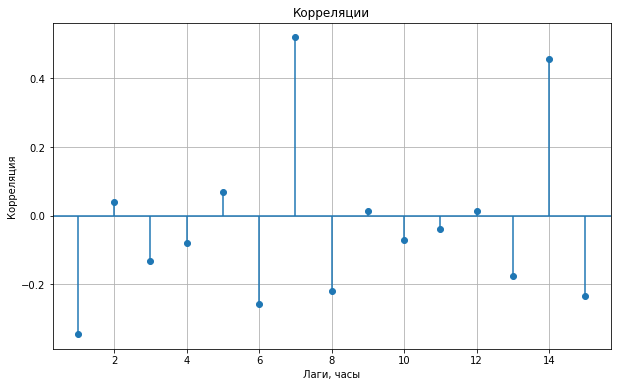

In [34]:
n_lags = 15
corr_list = []
for i_lag in range(1,n_lags+1):
    corr_list.append(np.corrcoef(y_train_series[i_lag:], y_train_series.shift(i_lag)[i_lag:])[0,1])
plt.figure(figsize=(10,6))
plt.vlines(range(1,n_lags+1), [0], corr_list)
plt.axhline()
plt.plot(range(1, n_lags+1), corr_list, 'o')
plt.title('Корреляции')
plt.xlabel('Лаги, часы')   
plt.ylabel('Корреляция')
plt.grid(True)


DMatrix - это внутренняя структура данных xgboost, которая заключает в себя функции данных и метки. Он разработан, чтобы быть эффективным и закреплять тренировочный процесс.DMatrix

In [35]:
X_train, X_test, y_train, y_test = prepare_data(df, lags=range(10), test_size=0.15,rolling_mean_size=7)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
params = {
        'objective': 'reg:squarederror',
        'booster':'gblinear'
    }

C:\Python27\anac\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# прогоняем на кросс-валидации с метрикой rmse
trees = 1000
cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

In [37]:
# обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

In [38]:
# запоминаем ошибку на кросс-валидации
deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

In [39]:
print('Среднее значение RMSE на тестовой выборке', deviation.round(1))

Среднее значение RMSE на тестовой выборке 0.1


No handles with labels found to put in legend.


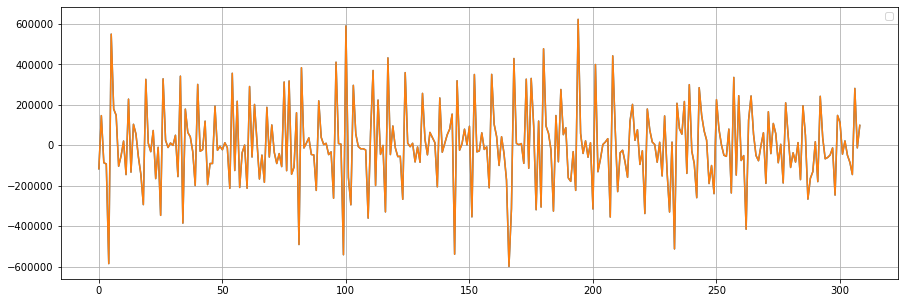

In [40]:
 # посмотрим, как модель вела себя на тренировочном отрезке ряда
prediction_train = bst.predict(dtrain)
plt.figure(figsize=(15, 5))
plt.plot(prediction_train)
plt.plot(y_train)
plt.axis('tight')
plt.grid(True)
plt.legend()

In [41]:
 # и на тестовом
scale=1.95    
prediction_test = bst.predict(dtest)
lower = prediction_test-scale*deviation
upper = prediction_test+scale*deviation

In [42]:
Anomalies = np.array([np.NaN]*len(y_test))
Anomalies[y_test<lower] = y_test[y_test<lower]

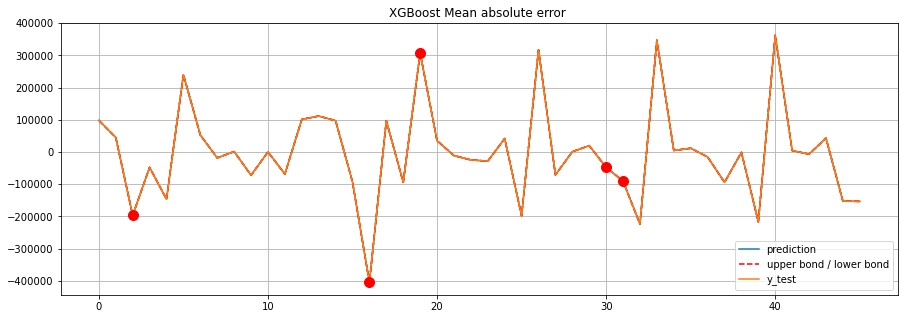

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(prediction_test, label="prediction")
plt.plot(lower, "r--", label="upper bond / lower bond")
plt.plot(upper, "r--")
plt.plot(list(y_test), label="y_test")
plt.plot(Anomalies, "ro", markersize=10)
plt.legend(loc="best")
plt.axis('tight')
plt.title("XGBoost Mean absolute error ".format(round(mean_absolute_error(prediction_test, y_test))))
plt.grid(True)
plt.legend()

In [44]:
print("RMSE тестовой выборки для XGBRegressor: ", round((mean_squared_error(y_test,prediction_test))**0.5))
print('MAE на тестовой выборке для XGBRegressor :' ,mean_absolute_error(y_test,prediction_test).round(1))

RMSE тестовой выборки для XGBRegressor:  0
MAE на тестовой выборке для XGBRegressor : 0.2


In [45]:
pd.DataFrame({ "Actuals":y_test[:10], "Prediction":bst.predict(dtest)[:10]})

,Actuals,Prediction
308,98203.07688,98202.984375
309,45150.76929,45150.832031
310,-196307.69233,-196307.421875
311,-47606.15388,-47606.109375
312,-146344.61536,-146344.859375
313,239846.15380,239846.375000
314,52750.76925,52750.519531
315,-18196.92308,-18197.062500
316,1470.76927,1470.823242
317,-72141.53850,-72141.304688


Исследуем просто XGBRegressor()

In [46]:
xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="rmse", verbose=False)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_test, y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_train, y_train))

Test  R2 Score : 1.00
Train R2 Score : 1.00


In [47]:
xgb_regressor.predict(X_test)[:5]

array([  98216.484,   43629.996, -197211.34 ,  -48666.586, -141216.   ],
      dtype=float32)

In [48]:
pd.DataFrame({ "Actuals":y_test[:10], "Prediction":xgb_regressor.predict(X_test)[:10]})

,Actuals,Prediction
308,98203.07688,98216.484375
309,45150.76929,43629.996094
310,-196307.69233,-197211.343750
311,-47606.15388,-48666.585938
312,-146344.61536,-141216.000000
313,239846.15380,238746.906250
314,52750.76925,52714.710938
315,-18196.92308,-17543.423828
316,1470.76927,1053.691895
317,-72141.53850,-69031.328125


In [49]:
print("Default Number of Estimators : ",xgb_regressor.n_estimators)
print("Default Max Depth of Trees   : ", xgb_regressor.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_regressor.feature_importances_], columns=X_train.columns)

Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


,lag_1,lag_2,lag_3,lag_4,lag_5,seasonal,hour,weekday,is_weekend,rolling_mean,lag_0,lag_6,lag_7,lag_8,lag_9
0,0.000128,0.000063,0.000021,0.000034,0.000025,0.000014,0.0,0.000007,0.0,0.000038,0.999529,0.000019,0.000029,0.000009,0.000083


In [50]:
print("RMSE тестовой выборки для defolt модели XGBRegressor: ", round((mean_squared_error(y_test,\
                                                                                         xgb_regressor.predict(X_test)))**0.5))
print('MAE на тестовой выборке для defolt модели XGBRegressor :' ,mean_absolute_error(y_test,\
                                                                                    xgb_regressor.predict(X_test)).round(1))

RMSE тестовой выборки для defolt модели XGBRegressor:  5978
MAE на тестовой выборке для defolt модели XGBRegressor : 2773.1


Подберем гиперпараметры модели

In [51]:

params = {
        'n_estimators': [25,35,95],
        'max_depth': [None, 1, 3],
        'eta': [0.01, 0.1, 3]
        }
#tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(xgb.XGBRegressor(),
                           param_grid=params,
                           cv=3,
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

print("Test  R2 Score : %.2f"%grid_search.score(X_test, y_test))
print("Train R2 Score : %.2f"%grid_search.score(X_train, y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")
pd.DataFrame([grid_search.best_estimator_.feature_importances_], columns=X_train.columns)

Test  R2 Score : 1.00
Train R2 Score : 1.00
Best Params :  {'eta': 0.1, 'max_depth': 3, 'n_estimators': 95}
Feature Importances : 


,lag_1,lag_2,lag_3,lag_4,lag_5,seasonal,hour,weekday,is_weekend,rolling_mean,lag_0,lag_6,lag_7,lag_8,lag_9
0,0.000668,0.000017,0.000017,0.00006,0.00013,0.000392,0.0,0.0,0.0,0.000076,0.998375,0.000052,0.000063,0.000092,0.000059


In [52]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Size : ", grid_search_results.shape)
grid_search_results.head()

Grid Search Size :  (27, 14)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050999,0.003742,0.003333,0.000471,0.01,None,25,"{'eta': 0.01, 'max_depth': None, 'n_estimators...",0.348384,0.359654,0.371340,0.359793,0.009372,15
1,0.067333,0.004989,0.003333,0.000471,0.01,None,35,"{'eta': 0.01, 'max_depth': None, 'n_estimators...",0.448334,0.461425,0.477861,0.462540,0.012080,13
2,0.158666,0.006600,0.003667,0.000472,0.01,None,95,"{'eta': 0.01, 'max_depth': None, 'n_estimators...",0.792351,0.801929,0.829010,0.807763,0.015524,10
3,0.018442,0.000416,0.002891,0.000154,0.01,1,25,"{'eta': 0.01, 'max_depth': 1, 'n_estimators': 25}",0.211173,0.194288,0.264850,0.223437,0.030084,18
4,0.023999,0.001633,0.004667,0.002357,0.01,1,35,"{'eta': 0.01, 'max_depth': 1, 'n_estimators': 35}",0.280257,0.255952,0.345727,0.293979,0.037913,17


In [53]:
# выберем лучшую модель
model = xgb.XGBRegressor(**grid_search.best_params_)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="rmse", verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=95, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print("Test  R2 Score : %.2f"%model.score(X_test, y_test))
print("Train R2 Score : %.2f"%model.score(X_train, y_train))

Test  R2 Score : 1.00
Train R2 Score : 1.00


In [62]:
pred_model = model.predict(X_test)


In [63]:
print("RMSE тестовой выборки для лучшей модели XGBRegressor: ", round((mean_squared_error(y_test,pred_model))**0.5))
print('MAE на тестовой выборке для лучшей модели XGBRegressor :' ,mean_absolute_error(y_test,pred_model).round(1))

RMSE тестовой выборки для лучшей модели XGBRegressor:  5593
MAE на тестовой выборке для лучшей модели XGBRegressor : 2311.3


In [68]:
a=pd.DataFrame({ "Actuals":y_test[:-1], "Prediction":pred_model[:-1]})
a

,Actuals,Prediction
308,98203.07688,98971.664062
309,45150.76929,41646.417969
310,-196307.69233,-194126.750000
311,-47606.15388,-48474.046875
312,-146344.61536,-143703.984375
313,239846.15380,241826.671875
314,52750.76925,52385.816406
315,-18196.92308,-16482.896484
316,1470.76927,1635.689331
317,-72141.53850,-68098.726562


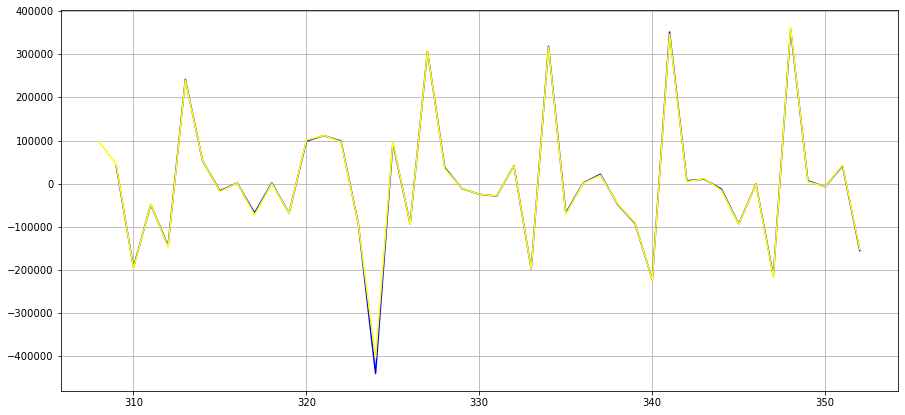

In [65]:
fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot()

#a["Actuals"].loc[:345].plot(color='blue')
a['Prediction'].loc[309:].plot(color = 'blue')
a['Actuals'].plot(color = 'yellow')
plt.grid(True)
plt.show()

In [77]:
range_data = pd.date_range(start ='2017-01-01', end ='2018-03-30',
                                                   freq ='1D')
 
a = pd.DataFrame(index=range_data, columns ={ "Actuals":y_test, "Prediction":pred_model})

 
a

,Actuals,Prediction
2017-01-01,NaN,NaN
2017-01-02,NaN,NaN
2017-01-03,NaN,NaN
2017-01-04,NaN,NaN
2017-01-05,NaN,NaN
...,...,...
2018-03-26,NaN,NaN
2018-03-27,NaN,NaN
2018-03-28,NaN,NaN
2018-03-29,NaN,NaN


In [60]:
ggg-===

SyntaxError: invalid syntax (Temp/ipykernel_11800/1969892234.py, line 1)

                        PROPHET

In [ ]:
data = data.resample('1D').sum()
data

In [ ]:
col = data.columns
col = ['Zone 2  Power Consumption', 'Zone 3  Power Consumption',
   'Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']
df = data.drop(columns=(col),axis=1).reset_index()
df.info()
df

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.rename(columns = {'DateTime' : 'ds','Zone 1 Power Consumption' : 'y'},\
                                                   inplace=True)
df['y'] = df['y'].astype('int')
df

In [ ]:

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m,horizon='30 days', parallel="processes",period='60 days', initial='120days' )
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

In [ ]:
future = m.make_future_dataframe(periods= 30)# отрезаем из обучающей выборки последние 30 дней, чтобы измерить на них качество
future

С помощью вспомогательной функции Prophet.make_future_dataframe созд dataframe, который содержит все исторические 
временные точки и еще 30 дней, для которых мы хотели построить прогноз.

In [ ]:
forecast = m.predict(future)
forecast

In [ ]:
#df_cv = cross_validation(m,horizon = '30 days', period='60 days', initial='120days')
df_cv.head() 

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
# рассчет метрик модели
#df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:

fig = plot_cross_validation_metric(df_cv, metric='mae')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Столбцы в прогнозе 
ds, t, trend, seasonal_lower, seasonal_upper, trend_lower, trend_upper, yhat_lower, yhat_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, seasonal, yhat

In [ ]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
print(cmp_df.head())

In [ ]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']

print ('MAPE :', np.mean(abs(cmp_df[-300:]['p'])))#  это последние 30 дней наблюдений
print ('MAE :', np.mean(abs(cmp_df[-300:]['e'])))

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
fig = m.plot(forecast, figsize=(15, 7))
# существенные изменение тренда
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0.01)

In [ ]:
m.changepoints

In [ ]:
m = Prophet(weekly_seasonality=20)
m.add_country_holidays(country_name='USA')
m.fit(df)

future = m.make_future_dataframe(periods= 30)
forecast = m.predict(future)

In [ ]:
fig3 = m.plot_components(forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)